In [ ]:
# Save the first few rows (head) of df3 to a CSV file
dk3.to_csv('dk3_1.csv', index=False)

# Use this to download the file
from google.colab import files
files.download('dk3_1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df7 = df3

In [ ]:
!pip install transformers
!pip install pandas scikit-learn empath transformers
!pip install empath
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for empath: filename=empath-0.89-py3-none-any.whl size=57798 sha256=706c316e40274f8aa63a36c040a49c2c016f132f9f4ae6596828206fa2fac237
  Stored in directory: /root/.cache/pip/wheels/92/b3/83/9eb2c6199881e2385a59d99bd911363475060ebeb4bdb27242
Successfully built empath


In [ ]:
import pandas as pd
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
from empath import Empath
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Import required library
from google.colab import files
import pandas as pd

# Step 1: Upload the Excel file
uploaded = files.upload()

# Step 2: Load the Excel file into a Pandas DataFrame
# Replace 'your_file.xlsx' with the uploaded file's name
df9 = pd.read_excel(list(uploaded.keys())[0])

Saving dk3_1.xlsx to dk3_1.xlsx


In [ ]:
dk5=df9

In [ ]:
# 4.2 Label Evaluation Metrics

# 1. Label Coverage: Percentage of rows where a final label is assigned (not "No Agreement")
label_coverage = (dk5['final_label'] != 'No Agreement').mean() * 100
print(f"Label Coverage: {label_coverage:.2f}%")

# 2. Consistency Across Models: Percentage of rows where at least 2 models agree on the label
# This checks if the labels from category_from_psycholinguistic, zero_shot_label, and category match
consistency_count = dk5.apply(lambda row: len(set([row['category_from_psycholinguistic'], row['zero_shot_label'], row['category']])) <= 2, axis=1).sum()
consistency_percentage = (consistency_count / len(dk5)) * 100
print(f"Consistency Across Models: {consistency_percentage:.2f}%")

Label Coverage: 64.84%
Consistency Across Models: 64.84%


In [ ]:
# 4.2 Label Evaluation Metrics

# 1. Label Coverage: Percentage of rows where a final label is assigned (not "No Agreement")
label_coverage = (dk5['final_label'] != 'No Agreement').mean() * 100
print(f"Label Coverage: {label_coverage:.2f}%")

# 2. Consistency Across Models: Percentage of rows where at least 2 models agree on the label
# This checks if the labels from category_from_psycholinguistic, zero_shot_label, and category match
consistency_count = dk5.apply(lambda row: len(set([row['category_from_psycholinguistic'], row['zero_shot_label'], row['narcissism_label']])) <= 2, axis=1).sum()
consistency_percentage = (consistency_count / len(dk5)) * 100
print(f"Consistency Across Models: {consistency_percentage:.2f}%")

Label Coverage: 64.84%
Consistency Across Models: 86.84%


In [ ]:
df9.head()

,tweet,sent,cleaned_tweets,sentiment,sentiment_score,category,empath_scores,narcissism_label,emotion,category_label,...,empath_affection,empath_trust,empath_social,textblob_polarity,textblob_subjectivity,zero_shot_label,psycholinguistic_score,category_from_psycholinguistic,final_label,spacy_attention
0,covering court stories years people cry remand...,2,covering court stories years people cry remand...,NEGATIVE,-0.6249,Vulnerable Narcissism,"{'confidence': 0.0, 'dominance': 0.0, 'self-fo...",Unclassified,joy,Unclassified,...,0.0,0.0,0,0.35,0.444444,Empathic Traits,0.197009,Unclassified,No Agreement,"25,25"
1,sapoliceservice phumlanimthoko good jobs perfe...,1,sapoliceservice phumlanimthoko good jobs perfe...,POSITIVE,0.8555,Grandiose Narcissism,"{'confidence': 0.0, 'dominance': 0.0, 'self-fo...",Grandiose Narcissism,joy,Unclassified,...,0.0,0.0,0,0.70,0.600000,Empathic Traits,0.334838,Empathic Traits,Empathic Traits,"6,6"
2,vusisambo happy birthday gentleman intellect h...,1,vusisambo happy birthday gentleman intellect h...,POSITIVE,0.9403,Grandiose Narcissism,"{'confidence': 0.0, 'dominance': 0.0, 'self-fo...",Unclassified,joy,Unclassified,...,0.0,0.0,0,0.35,0.787500,Empathic Traits,0.363490,Empathic Traits,Empathic Traits,"16,16"
3,collecting happy birthdays till die purposeful...,1,collecting happy birthdays till die purposeful...,POSITIVE,0.5423,Grandiose Narcissism,"{'confidence': 0.0, 'dominance': 0.0, 'self-fo...",Grandiose Narcissism,joy,Unclassified,...,0.0,0.0,0,0.55,0.500000,Grandiose Narcissism,0.330929,Empathic Traits,Grandiose Narcissism,"8,8"
4,makes happy life wait thinking paralysis analysis,1,makes happy life wait thinking paralysis analysis,POSITIVE,0.5719,Empathic Traits,"{'confidence': 0.0, 'dominance': 0.0, 'self-fo...",Unclassified,joy,Unclassified,...,0.0,0.0,0,0.80,1.000000,Vulnerable Narcissism,0.342013,Empathic Traits,Empathic Traits,"7,7"


In [ ]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import torch

# Check GPU
device = 0 if torch.cuda.is_available() else -1
print(f"Using device: {'GPU' if device == 0 else 'CPU'}")


Using device: GPU


In [ ]:
# Preprocessing function for text
def preprocess_text(text):
    # Remove mentions, hashtags, and URLs
    text = re.sub(r'@\w+|#\w+|http\S+', '', text)
    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text.strip()

# Reload dataset (replace 'path_to_dataset' with your dataset path or DataFrame)
# Example:
# df3 = pd.read_csv('path_to_dataset.csv')

# Apply preprocessing
df3['cleaned_tweets'] = df3['tweet'].apply(preprocess_text)

In [ ]:
# Initialize VADER
vader_analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment and sentiment score
def get_sentiment_vader(text):
    scores = vader_analyzer.polarity_scores(text)
    sentiment = 'POSITIVE' if scores['compound'] > 0 else 'NEGATIVE'
    return sentiment, scores['compound']

# Apply VADER
df3[['sentiment', 'sentiment_score']] = df3['cleaned_tweets'].apply(
    lambda x: pd.Series(get_sentiment_vader(x))
)


In [ ]:
#pip install rapidfuzz
#df3.head()
df6=df3

In [ ]:
from rapidfuzz import fuzz, process

# Expanded dictionaries for labels (as given)
grandiose_keywords = [
    "superior", "best", "greatest", "amazing", "perfect", "unique", "admire",
    "celebrity", "fame", "brilliant", "extraordinary", "powerful", "dominant",
    "success", "leader", "magnificent", "outstanding", "winner", "authority",
    "prestige", "fabulous", "elite", "exceptional", "renowned", "spectacular",
    "genius", "unstoppable", "glorious", "acclaimed", "idolized", "legendary",
    "remarkable", "invincible", "flawless", "superb", "heroic", "bold",
    "adored", "distinguished", "top-tier", "champion", "celebrated", "master"
]

vulnerable_keywords = [
    "insecure", "shy", "self-doubt", "anxious", "criticized", "sensitive",
    "fearful", "neglected", "hurt", "emotional", "lonely", "overwhelmed",
    "betrayed", "fragile", "vulnerable", "miserable", "guilty", "weak",
    "isolated", "unsure", "apologetic", "rejected", "ashamed", "despair",
    "humiliated", "depressed", "grieving", "lost", "inferior", "afraid",
    "uncertain", "unloved", "helpless", "self-conscious", "misunderstood",
    "ashamed", "timid", "frustrated", "invisible", "unworthy", "sad",
    "withdrawn", "self-pity", "downcast", "distressed", "humbled"
]

empathic_keywords = [
    "compassionate", "understanding", "kind", "empathetic", "caring", "gentle",
    "supportive", "nurturing", "considerate", "patient", "listening", "sympathy",
    "forgiving", "loving", "altruistic", "generous", "helpful", "kindhearted"
]

# Function for fuzzy matching with keywords
def match_keywords(text, keywords):
    scores = [fuzz.partial_ratio(text, keyword) for keyword in keywords]
    max_score = max(scores)
    return max_score

# Categorizing tweets using rule-based keyword matching
def categorize_tweet(text):
    grandiose_score = match_keywords(text, grandiose_keywords)
    vulnerable_score = match_keywords(text, vulnerable_keywords)
    empathic_score = match_keywords(text, empathic_keywords)

    # Define thresholds for categories
    if grandiose_score > 70:
        return "Grandiose Narcissism"
    elif vulnerable_score > 70:
        return "Vulnerable Narcissism"
    elif empathic_score > 70:
        return "Empathic Traits"
    else:
        return "Unclassified"

# Apply categorization
df3['category'] = df3['cleaned_tweets'].apply(categorize_tweet)


In [ ]:
#Emphath
# Initialize Empath lexicon
empath = Empath()

# Extract Empath categories
def get_empath_features(text):
    categories = empath.analyze(text, categories=["confidence", "dominance", "self-focus"])
    return categories

# Apply Empath features to 'cleaned_text'
df3["empath_scores"] = df3["cleaned_tweets"].apply(get_empath_features)


In [ ]:
import re

# Expanded dictionaries for narcissism categories
grandiose_keywords = [
    "superior", "best", "greatest", "amazing", "perfect", "unique", "admire",
    "celebrity", "fame", "brilliant", "extraordinary", "powerful", "dominant",
    "success", "leader", "magnificent", "outstanding", "winner", "authority",
    "prestige", "fabulous", "elite", "exceptional", "renowned", "spectacular",
    "genius", "unstoppable", "glorious", "acclaimed", "idolized", "legendary",
    "remarkable", "invincible", "flawless", "superb", "heroic", "bold",
    "adored", "distinguished", "top-tier", "champion", "celebrated", "master"
]

vulnerable_keywords = [
    "insecure", "shy", "self-doubt", "anxious", "criticized", "sensitive",
    "fearful", "neglected", "hurt", "emotional", "lonely", "overwhelmed",
    "betrayed", "fragile", "vulnerable", "miserable", "guilty", "weak",
    "isolated", "unsure", "apologetic", "rejected", "ashamed", "despair",
    "humiliated", "depressed", "grieving", "lost", "inferior", "afraid",
    "uncertain", "unloved", "helpless", "self-conscious", "misunderstood",
    "ashamed", "timid", "frustrated", "invisible", "unworthy", "sad",
    "withdrawn", "self-pity", "downcast", "distressed", "humbled"
]

empathic_keywords = [
    "compassionate", "caring", "empathetic", "kind", "supportive", "considerate",
    "generous", "thoughtful", "understanding", "nurturing", "loving", "forgiving",
    "selfless", "altruistic", "helpful", "patient", "affectionate", "humble",
    "tolerant", "respectful", "sympathetic", "peaceful", "open-minded", "non-judgmental"
]

# Function to check the presence of keywords
def get_narcissism_category(text):
    grandiose_score = sum([1 for word in grandiose_keywords if word in text])
    vulnerable_score = sum([1 for word in vulnerable_keywords if word in text])
    empathic_score = sum([1 for word in empathic_keywords if word in text])

    # Determine category based on the highest score
    if grandiose_score > max(vulnerable_score, empathic_score):
        return 'Grandiose Narcissism'
    elif vulnerable_score > max(grandiose_score, empathic_score):
        return 'Vulnerable Narcissism'
    elif empathic_score > max(grandiose_score, vulnerable_score):
        return 'Empathic Traits'
    else:
        return 'Unclassified'

# Apply the function to your cleaned tweet data
df3['narcissism_label'] = df3['cleaned_tweets'].apply(get_narcissism_category)

In [ ]:
# Load emotion detection model (e.g., using DistilRoBERTa)
emotion_analyzer = pipeline('text-classification', model='j-hartmann/emotion-english-distilroberta-base')

# Apply emotion detection
df3['emotion'] = df3['cleaned_tweets'].apply(lambda x: emotion_analyzer(x)[0]['label'])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cuda:0
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


In [ ]:
df3.head()

,tweet,sent,cleaned_tweets,sentiment,sentiment_score,category,empath_scores,narcissism_label,emotion
0,covering court stories years people cry remand...,2,covering court stories years people cry remand...,NEGATIVE,-0.6249,Vulnerable Narcissism,"{'confidence': 0.0, 'dominance': 0.0, 'self-fo...",Unclassified,joy
1,sapoliceservice phumlanimthoko good jobs perfe...,1,sapoliceservice phumlanimthoko good jobs perfe...,POSITIVE,0.8555,Grandiose Narcissism,"{'confidence': 0.0, 'dominance': 0.0, 'self-fo...",Grandiose Narcissism,joy
2,vusisambo happy birthday gentleman intellect h...,1,vusisambo happy birthday gentleman intellect h...,POSITIVE,0.9403,Grandiose Narcissism,"{'confidence': 0.0, 'dominance': 0.0, 'self-fo...",Unclassified,joy
3,collecting happy birthdays till die purposeful...,1,collecting happy birthdays till die purposeful...,POSITIVE,0.5423,Grandiose Narcissism,"{'confidence': 0.0, 'dominance': 0.0, 'self-fo...",Grandiose Narcissism,joy
4,makes happy life wait thinking paralysis analysis,1,makes happy life wait thinking paralysis analysis,POSITIVE,0.5719,Empathic Traits,"{'confidence': 0.0, 'dominance': 0.0, 'self-fo...",Unclassified,joy


In [ ]:
pip install vaderSentiment textblob empath


In [ ]:
df3.head()

,cleaned_tweets,psycholinguistic_profile,vader_positive,vader_negative,vader_neutral,vader_compound,textblob_polarity,textblob_subjectivity,empath_achievement,empath_anger,empath_sadness,empath_positive_emotion,empath_negative_emotion,empath_social
0,I am the best! Nobody can do what I do. #winning,"{'vader_positive': 0.467, 'vader_negative': 0....",0.467,0.000,0.533,0.8356,0.75,0.525,0.0,0.0,0.0,0.0,0.0,0.0
1,I feel so low today. Everything is falling apart.,"{'vader_positive': 0.0, 'vader_negative': 0.38...",0.000,0.383,0.617,-0.5173,0.00,0.300,0.0,0.0,0.0,0.0,0.0,0.0
2,"I’m okay, just tired of everything.","{'vader_positive': 0.216, 'vader_negative': 0....",0.216,0.330,0.455,-0.2500,0.05,0.600,0.0,0.0,0.0,0.0,0.0,0.0
3,"I am proud of my achievements, and I deserve a...","{'vader_positive': 0.22, 'vader_negative': 0.0...",0.220,0.000,0.780,0.4767,0.80,1.000,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import pandas as pd
from empath import Empath  # Install using `pip install empath`

# Initialize tools
vader_analyzer = SentimentIntensityAnalyzer()
empath_analyzer = Empath()

# Function to get VADER sentiment scores
def get_vader_scores(text):
    """
    Get sentiment scores using VADER Sentiment Analyzer.
    :param text: The input text
    :return: Sentiment scores as a dictionary
    """
    return vader_analyzer.polarity_scores(text)

# Function to get TextBlob sentiment scores
def get_textblob_scores(text):
    """
    Get polarity and subjectivity using TextBlob.
    :param text: The input text
    :return: Sentiment polarity and subjectivity
    """
    blob = TextBlob(text)
    return {'polarity': blob.sentiment.polarity, 'subjectivity': blob.sentiment.subjectivity}

# Function to get Empath categories (LIWC-like psycholinguistic features)
def get_empath_scores(text):
    """
    Get psycholinguistic features using Empath.
    :param text: The input text
    :return: Selected empath category scores as a dictionary
    """
    # Analyze text with Empath and extract specific categories
    categories = ['achievement', 'anger', 'sadness', 'positive_emotion', 'negative_emotion', 'social']
    empath_scores = empath_analyzer.analyze(text, categories=categories)
    return empath_scores

# Define classification based on psycholinguistic and sentiment scores
def classify_psycholinguistic_profile(text):
    """
    Classify the text's psycholinguistic profile based on VADER, TextBlob, and Empath scores.
    :param text: The input text to classify
    :return: A dictionary with psycholinguistic insights
    """
    # Get VADER sentiment scores
    vader_scores = get_vader_scores(text)

    # Get TextBlob sentiment polarity and subjectivity
    textblob_scores = get_textblob_scores(text)

    # Get Empath psycholinguistic scores
    empath_scores = get_empath_scores(text)

    # Construct psycholinguistic profile
    profile = {
        'vader_positive': vader_scores['pos'],
        'vader_negative': vader_scores['neg'],
        'vader_neutral': vader_scores['neu'],
        'vader_compound': vader_scores['compound'],
        'textblob_polarity': textblob_scores['polarity'],
        'textblob_subjectivity': textblob_scores['subjectivity'],
        'empath_achievement': empath_scores['achievement'],
        'empath_anger': empath_scores['anger'],
        'empath_sadness': empath_scores['sadness'],
        'empath_positive_emotion': empath_scores['positive_emotion'],
        'empath_negative_emotion': empath_scores['negative_emotion'],
        'empath_social': empath_scores['social']
    }
    return profile

# Example DataFrame (replace with your cleaned dataset)
df3 = pd.DataFrame({
    'cleaned_tweets': [
        "I am the best! Nobody can do what I do. #winning",
        "I feel so low today. Everything is falling apart.",
        "I’m okay, just tired of everything.",
        "I am proud of my achievements, and I deserve all of it"
    ]
})

# Apply psycholinguistic profiling to each tweet in df3['cleaned_tweets']
df3['psycholinguistic_profile'] = df3['cleaned_tweets'].apply(classify_psycholinguistic_profile)

# Expand the profile into individual columns for easier interpretation
profile_df = pd.json_normalize(df3['psycholinguistic_profile'])
df3 = pd.concat([df3, profile_df], axis=1)

# Output the DataFrame to see the classification results
print(df3[['cleaned_tweets'] + list(profile_df.columns)])


In [ ]:
df4=print(df3[['cleaned_tweets'] + list(profile_df.columns)])

                                      cleaned_tweets  vader_positive  \
0   I am the best! Nobody can do what I do. #winning           0.467   
1  I feel so low today. Everything is falling apart.           0.000   
2                I’m okay, just tired of everything.           0.216   
3  I am proud of my achievements, and I deserve a...           0.220   

   vader_negative  vader_neutral  vader_compound  textblob_polarity  \
0           0.000          0.533          0.8356               0.75   
1           0.383          0.617         -0.5173               0.00   
2           0.330          0.455         -0.2500               0.05   
3           0.000          0.780          0.4767               0.80   

   textblob_subjectivity  empath_achievement  empath_anger  empath_sadness  \
0                  0.525                 0.0           0.0             0.0   
1                  0.300                 0.0           0.0             0.0   
2                  0.600                 0.0     

## LABELLING CONSENSUS ##


In [ ]:
pip install empath vaderSentiment textblob pandas numpy


In [ ]:
df9.head()

,tweet,sent,cleaned_tweets,sentiment,sentiment_score,category,empath_scores,narcissism_label,emotion,category_label,...,empath_self_focus,empath_achievement,empath_anger,empath_positive_emotion,empath_sadness,empath_affection,empath_trust,empath_social,textblob_polarity,textblob_subjectivity
0,covering court stories years people cry remand...,2,covering court stories years people cry remand...,NEGATIVE,-0.6249,Vulnerable Narcissism,"{'confidence': 0.0, 'dominance': 0.0, 'self-fo...",Unclassified,joy,Unclassified,...,0,0.0000,0.0,0.040000,0.04,0.0,0.0,0,0.35,0.444444
1,sapoliceservice phumlanimthoko good jobs perfe...,1,sapoliceservice phumlanimthoko good jobs perfe...,POSITIVE,0.8555,Grandiose Narcissism,"{'confidence': 0.0, 'dominance': 0.0, 'self-fo...",Grandiose Narcissism,joy,Unclassified,...,0,0.0000,0.0,0.000000,0.00,0.0,0.0,0,0.70,0.600000
2,vusisambo happy birthday gentleman intellect h...,1,vusisambo happy birthday gentleman intellect h...,POSITIVE,0.9403,Grandiose Narcissism,"{'confidence': 0.0, 'dominance': 0.0, 'self-fo...",Unclassified,joy,Unclassified,...,0,0.0625,0.0,0.125000,0.00,0.0,0.0,0,0.35,0.787500
3,collecting happy birthdays till die purposeful...,1,collecting happy birthdays till die purposeful...,POSITIVE,0.5423,Grandiose Narcissism,"{'confidence': 0.0, 'dominance': 0.0, 'self-fo...",Grandiose Narcissism,joy,Unclassified,...,0,0.1250,0.0,0.125000,0.00,0.0,0.0,0,0.55,0.500000
4,makes happy life wait thinking paralysis analysis,1,makes happy life wait thinking paralysis analysis,POSITIVE,0.5719,Empathic Traits,"{'confidence': 0.0, 'dominance': 0.0, 'self-fo...",Unclassified,joy,Unclassified,...,0,0.0000,0.0,0.142857,0.00,0.0,0.0,0,0.80,1.000000


In [ ]:
import pandas as pd
from empath import Empath
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

# Initialize tools
empath_analyzer = Empath()
vader_analyzer = SentimentIntensityAnalyzer()

# Feature extraction functions
def extract_vader_features(text):
    vader_scores = vader_analyzer.polarity_scores(text)
    return {
        'vader_positive': vader_scores['pos'],
        'vader_negative': vader_scores['neg'],
        'vader_neutral': vader_scores['neu'],
        'vader_compound': vader_scores['compound']
    }

def extract_empath_features(text):
    empath_scores = empath_analyzer.analyze(text, categories=None, normalize=True)
    selected_features = ['self_focus', 'achievement', 'anger', 'positive_emotion',
                         'sadness', 'affection', 'trust', 'social']
    filtered_scores = {f"empath_{feature}": empath_scores.get(feature, 0) for feature in selected_features}
    return filtered_scores

def extract_textblob_features(text):
    blob = TextBlob(text)
    return {
        'textblob_polarity': blob.sentiment.polarity,
        'textblob_subjectivity': blob.sentiment.subjectivity
    }

def generate_psycholinguistic_profile(text):
    vader_features = extract_vader_features(text)
    empath_features = extract_empath_features(text)
    textblob_features = extract_textblob_features(text)
    profile = {**vader_features, **empath_features, **textblob_features}
    return profile

def label_psycholinguistic_categories(profile):
    """
    Label the text into one of four categories:
    - Grandiose Narcissism
    - Vulnerable Narcissism
    - Empathic Traits (Non-Narcissistic)
    - Unclassified
    """
    if profile['empath_self_focus'] > 0.5 and profile['empath_achievement'] > 0.3 and profile['vader_compound'] > 0.3:
        return "Grandiose Narcissism"
    elif profile['empath_self_focus'] > 0.5 and profile['vader_compound'] < -0.3 and profile['textblob_subjectivity'] > 0.5:
        return "Vulnerable Narcissism"
    elif profile['empath_trust'] > 0.3 and profile['empath_social'] > 0.3 and profile['vader_compound'] > 0.3:
        return "Empathic Traits (Non-Narcissistic)"
    else:
        return "Unclassified"

# Example: Applying to a dataset
if __name__ == "__main__":
    # Sample dataset
    data = {
        'cleaned_tweets': [
            "I just achieved an amazing milestone in my life!",
            "No one appreciates my efforts. It's so frustrating and unfair.",
            "I'm feeling so sad and lost today.",
            "I helped my friend today, and it feels great to support someone.",
            "I am the best at what I do. Everyone should recognize my greatness."
        ]
    }




In [ ]:
import pandas as pd
from empath import Empath
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

# Initialize tools
empath_analyzer = Empath()
vader_analyzer = SentimentIntensityAnalyzer()

# Feature extraction functions
def extract_vader_features(text):
    vader_scores = vader_analyzer.polarity_scores(text)
    return {
        'vader_positive': vader_scores['pos'],
        'vader_negative': vader_scores['neg'],
        'vader_neutral': vader_scores['neu'],
        'vader_compound': vader_scores['compound']
    }

def extract_empath_features(text):
    empath_scores = empath_analyzer.analyze(text, categories=None, normalize=True)
    selected_features = ['self_focus', 'achievement', 'anger', 'positive_emotion',
                         'sadness', 'affection', 'trust', 'social']
    filtered_scores = {f"empath_{feature}": empath_scores.get(feature, 0) for feature in selected_features}
    return filtered_scores

def extract_textblob_features(text):
    blob = TextBlob(text)
    return {
        'textblob_polarity': blob.sentiment.polarity,
        'textblob_subjectivity': blob.sentiment.subjectivity
    }

def generate_psycholinguistic_profile(text):
    vader_features = extract_vader_features(text)
    empath_features = extract_empath_features(text)
    textblob_features = extract_textblob_features(text)
    profile = {**vader_features, **empath_features, **textblob_features}
    return profile

def label_psycholinguistic_categories(profile):
    """
    Label the text into one of four categories:
    - Grandiose Narcissism
    - Vulnerable Narcissism
    - Empathic Traits (Non-Narcissistic)
    - Unclassified
    """
    if profile['empath_self_focus'] > 0.5 and profile['empath_achievement'] > 0.3 and profile['vader_compound'] > 0.3:
        return "Grandiose Narcissism"
    elif profile['empath_self_focus'] > 0.5 and profile['vader_compound'] < -0.3 and profile['textblob_subjectivity'] > 0.5:
        return "Vulnerable Narcissism"
    elif profile['empath_trust'] > 0.3 and profile['empath_social'] > 0.3 and profile['vader_compound'] > 0.3:
        return "Empathic Traits (Non-Narcissistic)"
    else:
        return "Unclassified"

# Example: Applying to df3 dataset
if __name__ == "__main__":
    # Assuming df3 is your DataFrame with the 'cleaned_tweets' column
    # Generate psycholinguistic profiles and labels for each tweet
    df9['psycholinguistic_profile'] = df9['cleaned_tweets'].apply(generate_psycholinguistic_profile)
    df9['category_label'] = df9['psycholinguistic_profile'].apply(label_psycholinguistic_categories)

    # Expand the profiles into separate columns
    profiles_df = pd.json_normalize(df9['psycholinguistic_profile'])

    # Concatenate the expanded profile columns with the existing dataframe
    df9 = pd.concat([df9, profiles_df], axis=1).drop(columns=['psycholinguistic_profile'])

    # Display the resulting dataframe
    print(df9.head())


                                               tweet  sent  \
0  covering court stories years people cry remand...     2   
1  sapoliceservice phumlanimthoko good jobs perfe...     1   
2  vusisambo happy birthday gentleman intellect h...     1   
3  collecting happy birthdays till die purposeful...     1   
4  makes happy life wait thinking paralysis analysis     1   

                                      cleaned_tweets sentiment  \
0  covering court stories years people cry remand...  NEGATIVE   
1  sapoliceservice phumlanimthoko good jobs perfe...  POSITIVE   
2  vusisambo happy birthday gentleman intellect h...  POSITIVE   
3  collecting happy birthdays till die purposeful...  POSITIVE   
4  makes happy life wait thinking paralysis analysis  POSITIVE   

   sentiment_score               category  \
0          -0.6249  Vulnerable Narcissism   
1           0.8555   Grandiose Narcissism   
2           0.9403   Grandiose Narcissism   
3           0.5423   Grandiose Narcissism   
4    

## BART ##

In [ ]:
df11=df9

In [ ]:
df9.head()

,tweet,sent,cleaned_tweets,sentiment,sentiment_score,category,empath_scores,narcissism_label,emotion,category_label,...,empath_achievement,empath_anger,empath_positive_emotion,empath_sadness,empath_affection,empath_trust,empath_social,textblob_polarity,textblob_subjectivity,zero_shot_label
0,covering court stories years people cry remand...,2,covering court stories years people cry remand...,NEGATIVE,-0.6249,Vulnerable Narcissism,"{'confidence': 0.0, 'dominance': 0.0, 'self-fo...",Unclassified,joy,Unclassified,...,0.0000,0.0,0.040000,0.04,0.0,0.0,0,0.35,0.444444,Empathic Traits
1,sapoliceservice phumlanimthoko good jobs perfe...,1,sapoliceservice phumlanimthoko good jobs perfe...,POSITIVE,0.8555,Grandiose Narcissism,"{'confidence': 0.0, 'dominance': 0.0, 'self-fo...",Grandiose Narcissism,joy,Unclassified,...,0.0000,0.0,0.000000,0.00,0.0,0.0,0,0.70,0.600000,Empathic Traits
2,vusisambo happy birthday gentleman intellect h...,1,vusisambo happy birthday gentleman intellect h...,POSITIVE,0.9403,Grandiose Narcissism,"{'confidence': 0.0, 'dominance': 0.0, 'self-fo...",Unclassified,joy,Unclassified,...,0.0625,0.0,0.125000,0.00,0.0,0.0,0,0.35,0.787500,Empathic Traits
3,collecting happy birthdays till die purposeful...,1,collecting happy birthdays till die purposeful...,POSITIVE,0.5423,Grandiose Narcissism,"{'confidence': 0.0, 'dominance': 0.0, 'self-fo...",Grandiose Narcissism,joy,Unclassified,...,0.1250,0.0,0.125000,0.00,0.0,0.0,0,0.55,0.500000,Grandiose Narcissism
4,makes happy life wait thinking paralysis analysis,1,makes happy life wait thinking paralysis analysis,POSITIVE,0.5719,Empathic Traits,"{'confidence': 0.0, 'dominance': 0.0, 'self-fo...",Unclassified,joy,Unclassified,...,0.0000,0.0,0.142857,0.00,0.0,0.0,0,0.80,1.000000,Vulnerable Narcissism


In [ ]:
from transformers import pipeline
import pandas as pd

# Load the zero-shot classification pipeline
zero_shot_classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Define candidate labels related to narcissistic traits
candidate_labels = [
    "Grandiose Narcissism",
    "Vulnerable Narcissism",
    "Empathic Traits",
    "Unclassified"
]

# Function to perform zero-shot classification on a batch of tweets
def batch_zero_shot_classification(tweets):
    # Perform classification in batch
    results = zero_shot_classifier(tweets, candidate_labels)
    # Extract the top predicted label from each result
    labels = [result['labels'][0] for result in results]
    return labels

# Apply zero-shot classification in batches (adjust batch size as needed)
batch_size = 32  # You can experiment with different batch sizes for performance
zero_shot_labels = []

# Process tweets in batches
for i in range(0, len(df9), batch_size):
    batch_tweets = df9['cleaned_tweets'][i:i+batch_size].tolist()
    batch_labels = batch_zero_shot_classification(batch_tweets)
    zero_shot_labels.extend(batch_labels)

# Add the results as a new column in the dataframe
df9['zero_shot_label'] = zero_shot_labels

# Check the results
print(df9[['cleaned_tweets', 'zero_shot_label']].head())


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0


                                      cleaned_tweets        zero_shot_label
0  covering court stories years people cry remand...        Empathic Traits
1  sapoliceservice phumlanimthoko good jobs perfe...        Empathic Traits
2  vusisambo happy birthday gentleman intellect h...        Empathic Traits
3  collecting happy birthdays till die purposeful...   Grandiose Narcissism
4  makes happy life wait thinking paralysis analysis  Vulnerable Narcissism


In [ ]:
import pandas as pd

# Define the ranges for normalization
feature_ranges = {
    'vader_positive': (0, 1),
    'vader_negative': (0, 1),
    'vader_neutral': (0, 1),
    'vader_compound': (-0.999, 0.997),
    'empath_self_focus': (0, 0),  # Note: all values in your dataset seem to be 0
    'empath_achievement': (0, 1),
    'empath_anger': (0, 1),
    'empath_positive_emotion': (0, 0.6),
    'empath_sadness': (0, 0.77),
    'empath_affection': (0, 0.6),
    'empath_trust': (0, 1),
    'empath_social': (0, 0),
    'textblob_polarity': (-1, 1),
    'textblob_subjectivity': (-1, 1)
}

# Function to normalize the feature values based on the provided range
def normalize(value, feature):
    min_val, max_val = feature_ranges[feature]
    if max_val - min_val == 0:  # If range is 0 (for constant values like 'empath_self_focus' or 'empath_social')
        return value
    return (value - min_val) / (max_val - min_val)

# Define the weights for each feature (as you had them)
weights = {
    'vader_positive': 0.1,
    'vader_negative': 0.1,
    'vader_neutral': 0.1,
    'vader_compound': 0.2,
    'empath_self_focus': 0.05,
    'empath_achievement': 0.1,
    'empath_anger': 0.05,
    'empath_positive_emotion': 0.1,
    'empath_sadness': 0.05,
    'empath_affection': 0.05,
    'empath_trust': 0.05,
    'empath_social': 0.05,
    'textblob_polarity': 0.05,
    'textblob_subjectivity': 0.05
}

# Function to calculate the weighted average psycholinguistic score
def calculate_weighted_average(row, weights):
    weighted_sum = 0
    total_weight = 0
    for feature, weight in weights.items():
        normalized_value = normalize(row[feature], feature)  # Normalize the feature value
        weighted_sum += normalized_value * weight
        total_weight += weight
    return weighted_sum / total_weight  # Normalize by total weight

# Assuming 'df3' is the DataFrame with your columns, apply the function to calculate the 'psycholinguistic_score'
df9['psycholinguistic_score'] = df9.apply(lambda row: calculate_weighted_average(row, weights), axis=1)

# Display the updated DataFrame with the new 'psycholinguistic_score' column
print(df9[['psycholinguistic_score']].head())  # Adjust to print more or fewer rows as needed


   psycholinguistic_score
0                0.197009
1                0.334838
2                0.363490
3                0.330929
4                0.342013


In [ ]:
#df9.head()
#df12=df9
df14=df12

In [ ]:
def label_categories(row):
    score = row['psycholinguistic_score']
    if score > 0.75:
        return 'Grandiose Narcissism'
    elif score > 0.5:
        return 'Vulnerable Narcissism'
    elif score > 0.25:
        return 'Empathic Traits'
    else:
        return 'Unclassified'

df9['category_from_psycholinguistic'] = df9.apply(label_categories, axis=1)
print(df9[['psycholinguistic_score', 'category_from_psycholinguistic']].head())


   psycholinguistic_score category_from_psycholinguistic
0                0.197009                   Unclassified
1                0.334838                Empathic Traits
2                0.363490                Empathic Traits
3                0.330929                Empathic Traits
4                0.342013                Empathic Traits


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels and predicted labels from psycholinguistic scores
print(confusion_matrix(df9['narcissism_label'], df9['category_from_psycholinguistic']))
print(classification_report(df9['narcissism_label'], df9['category_from_psycholinguistic']))


[[ 381    0  125    0]
 [2520    0  304    0]
 [7726    0 9071    0]
 [ 311    0 1000    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                       precision    recall  f1-score   support

      Empathic Traits       0.03      0.75      0.07       506
 Grandiose Narcissism       0.00      0.00      0.00      2824
         Unclassified       0.86      0.54      0.66     16797
Vulnerable Narcissism       0.00      0.00      0.00      1311

             accuracy                           0.44     21438
            macro avg       0.22      0.32      0.18     21438
         weighted avg       0.68      0.44      0.52     21438



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels and predicted labels from psycholinguistic scores
print(confusion_matrix(df9['zero_shot_label'], df9['category_from_psycholinguistic']))
print(classification_report(df9['zero_shot_label'], df9['category_from_psycholinguistic']))


[[6339    0 1494    0]
 [1009    0 1551    0]
 [2795    0 3060    0]
 [ 795    0 4395    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                       precision    recall  f1-score   support

      Empathic Traits       0.58      0.81      0.68      7833
 Grandiose Narcissism       0.00      0.00      0.00      2560
         Unclassified       0.29      0.52      0.37      5855
Vulnerable Narcissism       0.00      0.00      0.00      5190

             accuracy                           0.44     21438
            macro avg       0.22      0.33      0.26     21438
         weighted avg       0.29      0.44      0.35     21438



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import pandas as pd
from collections import Counter

# Example DataFrame (replace with your actual data)
df9 = pd.DataFrame({
    'category_from_psycholinguistic': ['Empathic Traits', 'Grandiose Narcissism', 'Unclassified', 'Vulnerable Narcissism'],
    'zero_shot_label': ['Empathic Traits', 'Grandiose Narcissism', 'Unclassified', 'Vulnerable Narcissism'],
    'category': ['Empathic Traits', 'Grandiose Narcissism', 'Unclassified', 'Vulnerable Narcissism']
})

# Define a function to apply majority voting on each row
def majority_voting(row):
    # Collect the three labels in each row
    labels = [row['category_from_psycholinguistic'], row['zero_shot_label'], row['category']]

    # Use Counter to find the most common label
    most_common = Counter(labels).most_common(1)

    # If at least two labels agree, return that label, otherwise return 'No Agreement' or 'Unclassified'
    if most_common[0][1] >= 2:
        return most_common[0][0]
    else:
        return 'No Agreement'  # You can set this to 'Unclassified' if preferred

# Apply the majority voting function across all rows and add the final label as a new column to df9
df9['final_label'] = df9.apply(majority_voting, axis=1)

# Print the resulting DataFrame with the new column
print(df9[['category_from_psycholinguistic', 'zero_shot_label', 'category', 'final_label']])



  category_from_psycholinguistic        zero_shot_label  \
0                Empathic Traits        Empathic Traits   
1           Grandiose Narcissism   Grandiose Narcissism   
2                   Unclassified           Unclassified   
3          Vulnerable Narcissism  Vulnerable Narcissism   

                category            final_label  
0        Empathic Traits        Empathic Traits  
1   Grandiose Narcissism   Grandiose Narcissism  
2           Unclassified           Unclassified  
3  Vulnerable Narcissism  Vulnerable Narcissism  


In [ ]:
import pandas as pd
from collections import Counter

# Example DataFrame (replace this with your actual df9)
df14 = pd.DataFrame({
    'category_from_psycholinguistic': ['Empathic Traits', 'Grandiose Narcissism', 'Unclassified', 'Vulnerable Narcissism'],
    'zero_shot_label': ['Empathic Traits', 'Grandiose Narcissism', 'Unclassified', 'Vulnerable Narcissism'],
    'category': ['Empathic Traits', 'Grandiose Narcissism', 'Unclassified', 'Vulnerable Narcissism']
})

# Define a function to apply majority voting on each row
def majority_voting(row):
    # Collect the three labels in each row
    labels = [row['category_from_psycholinguistic'], row['zero_shot_label'], row['category']]

    # Use Counter to find the most common label
    most_common = Counter(labels).most_common(1)

    # If at least two labels agree, return that label, otherwise return 'No Agreement' or 'Unclassified'
    if most_common[0][1] >= 2:
        return most_common[0][0]
    else:
        return 'No Agreement'  # You can set this to 'Unclassified' if preferred

# Apply the majority voting function and create a new column in df9
df14['final_label'] = df14.apply(majority_voting, axis=1)





In [ ]:
#dk2=df12
df12.head()

,tweet,sent,cleaned_tweets,sentiment,sentiment_score,category,empath_scores,narcissism_label,emotion,category_label,...,empath_sadness,empath_affection,empath_trust,empath_social,textblob_polarity,textblob_subjectivity,zero_shot_label,psycholinguistic_score,category_from_psycholinguistic,final_label
0,covering court stories years people cry remand...,2,covering court stories years people cry remand...,NEGATIVE,-0.6249,Vulnerable Narcissism,"{'confidence': 0.0, 'dominance': 0.0, 'self-fo...",Unclassified,joy,Unclassified,...,0.04,0.0,0.0,0,0.35,0.444444,Empathic Traits,0.197009,Unclassified,No Agreement
1,sapoliceservice phumlanimthoko good jobs perfe...,1,sapoliceservice phumlanimthoko good jobs perfe...,POSITIVE,0.8555,Grandiose Narcissism,"{'confidence': 0.0, 'dominance': 0.0, 'self-fo...",Grandiose Narcissism,joy,Unclassified,...,0.00,0.0,0.0,0,0.70,0.600000,Empathic Traits,0.334838,Empathic Traits,Empathic Traits
2,vusisambo happy birthday gentleman intellect h...,1,vusisambo happy birthday gentleman intellect h...,POSITIVE,0.9403,Grandiose Narcissism,"{'confidence': 0.0, 'dominance': 0.0, 'self-fo...",Unclassified,joy,Unclassified,...,0.00,0.0,0.0,0,0.35,0.787500,Empathic Traits,0.363490,Empathic Traits,Empathic Traits
3,collecting happy birthdays till die purposeful...,1,collecting happy birthdays till die purposeful...,POSITIVE,0.5423,Grandiose Narcissism,"{'confidence': 0.0, 'dominance': 0.0, 'self-fo...",Grandiose Narcissism,joy,Unclassified,...,0.00,0.0,0.0,0,0.55,0.500000,Grandiose Narcissism,0.330929,Empathic Traits,Grandiose Narcissism
4,makes happy life wait thinking paralysis analysis,1,makes happy life wait thinking paralysis analysis,POSITIVE,0.5719,Empathic Traits,"{'confidence': 0.0, 'dominance': 0.0, 'self-fo...",Unclassified,joy,Unclassified,...,0.00,0.0,0.0,0,0.80,1.000000,Vulnerable Narcissism,0.342013,Empathic Traits,Empathic Traits


In [ ]:
# 4.2 Label Evaluation Metrics

# 1. Label Coverage: Percentage of rows where a final label is assigned (not "No Agreement")
label_coverage = (dk2['final_label'] != 'No Agreement').mean() * 100
print(f"Label Coverage: {label_coverage:.2f}%")

# 2. Consistency Across Models: Percentage of rows where at least 2 models agree on the label
# This checks if the labels from category_from_psycholinguistic, zero_shot_label, and category match
consistency_count = dk2.apply(lambda row: len(set([row['category_from_psycholinguistic'], row['zero_shot_label'], row['category']])) <= 2, axis=1).sum()
consistency_percentage = (consistency_count / len(dk2)) * 100
print(f"Consistency Across Models: {consistency_percentage:.2f}%")


Label Coverage: 64.84%
Consistency Across Models: 64.84%


In [ ]:
from sklearn.metrics import classification_report

# Identify unique labels from both 'category' and 'final_label' columns
# Ensure 'No Agreement' is included if it's part of the predictions
labels = list(set(dk2['zero_shot_label'].unique()).union(set(dk2['final_label'].unique())))

# Generate the classification report
report = classification_report(dk2['zero_shot_label'], dk2['final_label'], labels=labels)

# Print the classification report
print(report)


                       precision    recall  f1-score   support

         No Agreement       0.00      0.00      0.00         0
 Grandiose Narcissism       1.00      0.57      0.72      2560
Vulnerable Narcissism       1.00      0.18      0.30      5190
      Empathic Traits       0.96      0.82      0.88      7833
         Unclassified       0.71      0.59      0.64      5855

             accuracy                           0.57     21438
            macro avg       0.73      0.43      0.51     21438
         weighted avg       0.91      0.57      0.66     21438



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import classification_report

# Identify unique labels from both 'category' and 'final_label' columns
# Ensure 'No Agreement' is included if it's part of the predictions
labels = list(set(dk2['category_from_psycholinguistic'].unique()).union(set(dk2['final_label'].unique())))

# Generate the classification report
report = classification_report(dk2['category_from_psycholinguistic'], dk2['final_label'], labels=labels)

# Print the classification report
print(report)



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                       precision    recall  f1-score   support

         No Agreement       0.00      0.00      0.00         0
 Grandiose Narcissism       0.00      0.00      0.00         0
Vulnerable Narcissism       0.00      0.00      0.00         0
      Empathic Traits       0.99      0.60      0.75     10938
         Unclassified       0.92      0.42      0.58     10500

             accuracy                           0.52     21438
            macro avg       0.38      0.21      0.27     21438
         weighted avg       0.96      0.52      0.67     21438



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'final_label' is your target column and you have a 'tweet' column to predict it
# Step 1: Preprocess the text (here using TF-IDF vectorization)
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Vectorize the 'tweet' column
X = vectorizer.fit_transform(dk2['cleaned_tweets'])  # Replace 'dk2['tweet']' with the column containing text
y = dk2['final_label']  # The target variable is 'final_label'

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 4: Predict and evaluate the model
y_pred = rf.predict(X_test)

# Print the classification report to evaluate model performance
print(classification_report(y_test, y_pred))

# Print the accuracy score
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


                       precision    recall  f1-score   support

      Empathic Traits       0.66      0.85      0.74      2043
 Grandiose Narcissism       0.79      0.20      0.32       436
         No Agreement       0.57      0.57      0.57      2264
         Unclassified       0.61      0.57      0.59      1425
Vulnerable Narcissism       0.74      0.20      0.32       264

             accuracy                           0.62      6432
            macro avg       0.67      0.48      0.51      6432
         weighted avg       0.63      0.62      0.60      6432

Accuracy: 0.6189365671641791


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

# Step 1: Preprocess the text (TF-IDF vectorization)
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Vectorize the 'tweet' column
X_tweet = vectorizer.fit_transform(dk2['cleaned_tweets'])  # Replace 'dk2['tweet']' with your column containing text

# Step 2: Get the 'psycholinguistic_score' column
X_psycholinguistic = dk2[['psycholinguistic_score']].values  # Ensures it's in the correct format (2D array)

# Step 3: Combine the two feature sets (TF-IDF + psycholinguistic score)
X_combined = hstack([X_tweet, X_psycholinguistic])  # hstack to combine sparse matrix with the psycholinguistic score

# Target variable
y = dk2['final_label']  # The target variable is 'final_label'

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.3, random_state=42)

# Step 5: Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 6: Predict and evaluate the model
y_pred = rf.predict(X_test)

# Print the classification report to evaluate model performance
print(classification_report(y_test, y_pred))

# Print the accuracy score
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


                       precision    recall  f1-score   support

      Empathic Traits       0.67      0.95      0.78      2043
 Grandiose Narcissism       0.85      0.19      0.31       436
         No Agreement       0.64      0.50      0.56      2264
         Unclassified       0.61      0.69      0.65      1425
Vulnerable Narcissism       0.76      0.20      0.32       264

             accuracy                           0.65      6432
            macro avg       0.71      0.50      0.52      6432
         weighted avg       0.66      0.65      0.62      6432

Accuracy: 0.6500310945273632


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

# Step 1: Preprocess the text (TF-IDF vectorization)
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Vectorize the 'tweet' column
X_tweet = vectorizer.fit_transform(dk2['cleaned_tweets'])  # Replace 'dk2['tweet']' with your column containing text

# Step 2: Get the 'psycholinguistic_score' and 'sentiment_score' columns
X_psycholinguistic = dk2[['psycholinguistic_score']].values  # Psycholinguistic score
X_sentiment = dk2[['sentiment_score']].values  # Sentiment score

# Step 3: Combine the three feature sets (TF-IDF + psycholinguistic score + sentiment score)
X_combined = hstack([X_tweet, X_psycholinguistic, X_sentiment])  # Combine all features

# Target variable
y = dk2['final_label']  # The target variable is 'final_label'

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.3, random_state=42)

# Step 5: Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 6: Predict and evaluate the model
y_pred = rf.predict(X_test)

# Print the classification report to evaluate model performance
print(classification_report(y_test, y_pred))

# Print the accuracy score
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


                       precision    recall  f1-score   support

      Empathic Traits       0.67      0.96      0.79      2043
 Grandiose Narcissism       0.89      0.19      0.31       436
         No Agreement       0.66      0.49      0.56      2264
         Unclassified       0.61      0.72      0.66      1425
Vulnerable Narcissism       0.81      0.20      0.32       264

             accuracy                           0.66      6432
            macro avg       0.73      0.51      0.53      6432
         weighted avg       0.67      0.66      0.63      6432

Accuracy: 0.6554726368159204


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

## XG ##

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Step 1: Preprocess the text (TF-IDF vectorization)
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Vectorize the 'tweet' column
X_tweet = vectorizer.fit_transform(dk2['cleaned_tweets'])  # Replace 'dk2['tweet']' with your column containing text

# Step 2: Get the 'psycholinguistic_score' and 'sentiment_score' columns
X_psycholinguistic = dk3[['psycholinguistic_score']].values.astype(float)  # Convert to float
X_sentiment = dk3[['sentiment_score']].values.astype(float)  # Convert to float

# Step 3: Handle 'spacy_attention' column
# Check if it's a string column, then replace commas with periods and convert to float
if dk3['spacy_attention'].dtype == 'object':  # If the column is of string type
    dk3['spacy_attention'] = dk3['spacy_attention'].str.replace(',', '.').astype(float)
else:  # If the column is already numeric, just use it as is
    dk3['spacy_attention'] = dk3['spacy_attention'].astype(float)

X_spacy_attention = dk3[['spacy_attention']].values  # Now it's a numeric array

# Step 4: Combine the feature sets (TF-IDF + psycholinguistic score + sentiment score + spaCy attention)
X_combined = hstack([X_tweet, X_psycholinguistic, X_sentiment, X_spacy_attention])  # Combine all features

# Target variable
y = dk3['final_label']  # The target variable is 'final_label'

# Step 5: Encode the target labels (y) using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_encoded, test_size=0.3, random_state=42)

# Step 7: Train an XGBoost model
xg_clf = xgb.XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xg_clf.fit(X_train, y_train)

# Step 8: Predict and evaluate the model
y_pred = xg_clf.predict(X_test)

# Print the classification report to evaluate model performance
print(classification_report(y_test, y_pred))

# Print the accuracy score
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:09:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.66      0.94      0.77      2043
           1       0.70      0.16      0.26       436
           2       0.57      0.48      0.52      2264
           3       0.60      0.61      0.60      1425
           4       0.54      0.10      0.17       264

    accuracy                           0.62      6432
   macro avg       0.61      0.46      0.46      6432
weighted avg       0.61      0.62      0.59      6432

Accuracy: 0.6175373134328358


## LIGHTGBM ##

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Step 1: Preprocess the text (TF-IDF vectorization)
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Vectorize the 'tweet' column
X_tweet = vectorizer.fit_transform(dk2['cleaned_tweets'])  # Replace 'dk2['tweet']' with your column containing text

# Step 2: Get the 'psycholinguistic_score' and 'sentiment_score' columns
X_psycholinguistic = dk3[['psycholinguistic_score']].values.astype(float)  # Convert to float
X_sentiment = dk3[['sentiment_score']].values.astype(float)  # Convert to float

# Step 3: Handle 'spacy_attention' column
# Check if it's a string column, then replace commas with periods and convert to float
if dk3['spacy_attention'].dtype == 'object':  # If the column is of string type
    dk3['spacy_attention'] = dk3['spacy_attention'].str.replace(',', '.').astype(float)
else:  # If the column is already numeric, just use it as is
    dk3['spacy_attention'] = dk3['spacy_attention'].astype(float)

X_spacy_attention = dk3[['spacy_attention']].values  # Now it's a numeric array

# Step 4: Combine the feature sets (TF-IDF + psycholinguistic score + sentiment score + spaCy attention)
X_combined = hstack([X_tweet, X_psycholinguistic, X_sentiment, X_spacy_attention])  # Combine all features

# Target variable
y = dk3['final_label']  # The target variable is 'final_label'

# Step 5: Encode the target labels (y) using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_encoded, test_size=0.3, random_state=42)

# Step 7: Train a LightGBM model
lgb_clf = lgb.LGBMClassifier(n_estimators=100, random_state=42)
lgb_clf.fit(X_train, y_train)

# Step 8: Predict and evaluate the model
y_pred = lgb_clf.predict(X_test)

# Print the classification report to evaluate model performance
print(classification_report(y_test, y_pred))

# Print the accuracy score
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.234245 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33085
[LightGBM] [Info] Number of data points in the train set: 15006, number of used features: 1513
[LightGBM] [Info] Start training from score -1.170938
[LightGBM] [Info] Start training from score -2.697510
[LightGBM] [Info] Start training from score -1.045851
[LightGBM] [Info] Start training from score -1.484675
[LightGBM] [Info] Start training from score -3.110421


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.67      0.91      0.77      2043
           1       0.62      0.17      0.26       436
           2       0.58      0.49      0.53      2264
           3       0.60      0.64      0.62      1425
           4       0.52      0.18      0.26       264

    accuracy                           0.62      6432
   macro avg       0.60      0.48      0.49      6432
weighted avg       0.61      0.62      0.60      6432

Accuracy: 0.622978855721393


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

# Step 1: Preprocess the text (TF-IDF vectorization)
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Vectorize the 'tweet' column
X_tweet = vectorizer.fit_transform(dk2['cleaned_tweets'])  # Replace 'dk2['tweet']' with your column containing text

# Step 2: Get the 'psycholinguistic_score' and 'sentiment_score' columns
X_psycholinguistic = dk3[['psycholinguistic_score']].values  # Psycholinguistic score
X_sentiment = dk3[['sentiment_score']].values  # Sentiment score
X_spacy_attention = dk3[['spacy_attention']].values
# Step 3: Combine the three feature sets (TF-IDF + psycholinguistic score + sentiment score)
X_combined = hstack([X_tweet, X_psycholinguistic, X_sentiment])  # Combine all features

# Target variable
y = dk3['final_label']  # The target variable is 'final_label'

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.3, random_state=42)

# Step 5: Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 6: Predict and evaluate the model
y_pred = rf.predict(X_test)

# Print the classification report to evaluate model performance
print(classification_report(y_test, y_pred))

# Print the accuracy score
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

                       precision    recall  f1-score   support

      Empathic Traits       0.67      0.96      0.79      2043
 Grandiose Narcissism       0.89      0.19      0.31       436
         No Agreement       0.66      0.49      0.56      2264
         Unclassified       0.61      0.72      0.66      1425
Vulnerable Narcissism       0.81      0.20      0.32       264

             accuracy                           0.66      6432
            macro avg       0.73      0.51      0.53      6432
         weighted avg       0.67      0.66      0.63      6432

Accuracy: 0.6554726368159204


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

# Step 1: Preprocess the text (TF-IDF vectorization)
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Vectorize the 'tweet' column
X_tweet = vectorizer.fit_transform(dk2['cleaned_tweets'])  # Replace 'dk2['tweet']' with your column containing text

# Step 2: Get the 'psycholinguistic_score' and 'sentiment_score' columns
X_psycholinguistic = dk3[['psycholinguistic_score']].values  # Psycholinguistic score
X_sentiment = dk3[['sentiment_score']].values  # Sentiment score
X_spacy_attention = dk3[['spacy_attention']].values
# Step 3: Combine the three feature sets (TF-IDF + psycholinguistic score + sentiment score)
X_combined = hstack([X_tweet, X_psycholinguistic, X_sentiment])  # Combine all features

# Target variable
y = dk3['final_label']  # The target variable is 'final_label'

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.3, random_state=42)

# Step 5: Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 6: Predict and evaluate the model
y_pred = rf.predict(X_test)

# Print the classification report to evaluate model performance
print(classification_report(y_test, y_pred))

# Print the accuracy score
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

                       precision    recall  f1-score   support

      Empathic Traits       0.67      0.96      0.79      2043
 Grandiose Narcissism       0.89      0.19      0.31       436
         No Agreement       0.66      0.49      0.56      2264
         Unclassified       0.61      0.72      0.66      1425
Vulnerable Narcissism       0.81      0.20      0.32       264

             accuracy                           0.66      6432
            macro avg       0.73      0.51      0.53      6432
         weighted avg       0.67      0.66      0.63      6432

Accuracy: 0.6554726368159204


## SPACY ##

In [ ]:
#dk3=dk2
dk3.head()

,tweet,sent,cleaned_tweets,sentiment,sentiment_score,category,empath_scores,narcissism_label,emotion,category_label,...,empath_affection,empath_trust,empath_social,textblob_polarity,textblob_subjectivity,zero_shot_label,psycholinguistic_score,category_from_psycholinguistic,final_label,spacy_attention
0,covering court stories years people cry remand...,2,covering court stories years people cry remand...,NEGATIVE,-0.6249,Vulnerable Narcissism,"{'confidence': 0.0, 'dominance': 0.0, 'self-fo...",Unclassified,joy,Unclassified,...,0.0,0.0,0,0.35,0.444444,Empathic Traits,0.197009,Unclassified,No Agreement,"25,25"
1,sapoliceservice phumlanimthoko good jobs perfe...,1,sapoliceservice phumlanimthoko good jobs perfe...,POSITIVE,0.8555,Grandiose Narcissism,"{'confidence': 0.0, 'dominance': 0.0, 'self-fo...",Grandiose Narcissism,joy,Unclassified,...,0.0,0.0,0,0.70,0.600000,Empathic Traits,0.334838,Empathic Traits,Empathic Traits,"6,6"
2,vusisambo happy birthday gentleman intellect h...,1,vusisambo happy birthday gentleman intellect h...,POSITIVE,0.9403,Grandiose Narcissism,"{'confidence': 0.0, 'dominance': 0.0, 'self-fo...",Unclassified,joy,Unclassified,...,0.0,0.0,0,0.35,0.787500,Empathic Traits,0.363490,Empathic Traits,Empathic Traits,"16,16"
3,collecting happy birthdays till die purposeful...,1,collecting happy birthdays till die purposeful...,POSITIVE,0.5423,Grandiose Narcissism,"{'confidence': 0.0, 'dominance': 0.0, 'self-fo...",Grandiose Narcissism,joy,Unclassified,...,0.0,0.0,0,0.55,0.500000,Grandiose Narcissism,0.330929,Empathic Traits,Grandiose Narcissism,"8,8"
4,makes happy life wait thinking paralysis analysis,1,makes happy life wait thinking paralysis analysis,POSITIVE,0.5719,Empathic Traits,"{'confidence': 0.0, 'dominance': 0.0, 'self-fo...",Unclassified,joy,Unclassified,...,0.0,0.0,0,0.80,1.000000,Vulnerable Narcissism,0.342013,Empathic Traits,Empathic Traits,"7,7"


In [ ]:
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from scipy.sparse import hstack
import numpy as np
import pandas as pd

# Load spaCy's pre-trained model (for example, en_core_web_sm)
nlp = spacy.load("en_core_web_sm")

# Preprocess text and get spaCy features (e.g., POS tags, dependency parsing)
def extract_spacy_features(text):
    doc = nlp(text)
    pos_tags = [token.pos_ for token in doc]  # Part-of-speech tags
    dep_tags = [token.dep_ for token in doc]  # Dependency parsing
    return pos_tags, dep_tags

# Extract TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = vectorizer.fit_transform(dk3['cleaned_tweets'])

# Extract spaCy features (e.g., part-of-speech tags, dependency parsing)
spacy_features = [extract_spacy_features(text) for text in dk3['cleaned_tweets']]

# Convert spaCy features into a simplified form (e.g., count lengths of POS and dep tags)
spacy_features = [[len(pos), len(dep)] for pos, dep in spacy_features]  # Example features

# Add the derived spaCy features as a new column to the original df (this won't overwrite your existing data)
dk3['spacy_attention'] = [f"{pos_len},{dep_len}" for pos_len, dep_len in spacy_features]

# Combine both sets of features (TF-IDF + spaCy features)
spacy_features = np.array(spacy_features)
X_combined = hstack([X_tfidf, spacy_features])

# Train-test split
y = dk3['final_label']
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.3, random_state=42)

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = rf.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


                       precision    recall  f1-score   support

      Empathic Traits       0.66      0.81      0.73      2043
 Grandiose Narcissism       0.89      0.19      0.32       436
         No Agreement       0.53      0.64      0.58      2264
         Unclassified       0.66      0.48      0.56      1425
Vulnerable Narcissism       0.71      0.18      0.28       264

             accuracy                           0.61      6432
            macro avg       0.69      0.46      0.49      6432
         weighted avg       0.63      0.61      0.59      6432



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

# Assuming you already have the following columns in your dataframe:
# - 'cleaned_tweets': column with preprocessed tweet text
# - 'psycholinguistic_score': psycholinguistic scores
# - 'sentiment_score': sentiment scores
# - 'spacy_attention': pre-calculated spaCy attention features
# - 'final_label': target variable

# Step 1: Preprocess the text (TF-IDF vectorization)
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Vectorize the 'cleaned_tweets' column
X_tweet = vectorizer.fit_transform(dk2['cleaned_tweets'])  # Replace 'cleaned_tweets' with your column

# Step 2: Get the additional feature columns
X_psycholinguistic = dk3[['psycholinguistic_score']].values  # Psycholinguistic score
X_sentiment = dk3[['sentiment_score']].values  # Sentiment score
X_spacy_attention = dk3[['spacy_attention']].values  # spaCy attention score

# Step 3: Combine the three feature sets (TF-IDF + psycholinguistic score + sentiment score + spaCy attention)
X_combined = hstack([X_tweet, X_psycholinguistic, X_sentiment, X_spacy_attention])  # Combine all features

# Target variable
y = dk3['final_label']  # The target variable is 'final_label'

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.3, random_state=42)

# Step 5: Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 6: Predict and evaluate the model
y_pred = rf.predict(X_test)

# Print the classificati


TypeError: no supported conversion for types: (dtype('float64'), dtype('float64'), dtype('float64'), dtype('O'))

In [ ]:
import pandas as pd

# Example of how the dataframe might look (adjust if necessary)
# Assuming 'category_from_psycholinguistic', 'zero_shot_label', 'category' exist in your dataframe

# Define the function first
def most_voted_label(row):
    # Get the list of predicted labels from the models
    labels = [row['category_from_psycholinguistic'], row['zero_shot_label'], row['category']]

    # Count the occurrences of each label
    label_counts = pd.Series(labels).value_counts()

    # If there's no consensus (i.e., the top two labels have equal counts), return "No Agreement"
    if label_counts.max() == 1:
        return 'No Agreement'

    # Otherwise, return the label with the highest count
    return label_counts.idxmax()

# Check the first few rows of your dataframe to ensure columns exist
print(dk1[['category_from_psycholinguistic', 'zero_shot_label', 'category']].head())

# Now apply the function to create the final_label column in your dataframe
dk1['final_label'] = dk1.apply(lambda row: most_voted_label(row), axis=1)

# Print the dataframe to see the changes
print(dk1[['category_from_psycholinguistic', 'zero_shot_label', 'category', 'final_label']].head())



  category_from_psycholinguistic        zero_shot_label               category
0                   Unclassified        Empathic Traits  Vulnerable Narcissism
1                Empathic Traits        Empathic Traits   Grandiose Narcissism
2                Empathic Traits        Empathic Traits   Grandiose Narcissism
3                Empathic Traits   Grandiose Narcissism   Grandiose Narcissism
4                Empathic Traits  Vulnerable Narcissism        Empathic Traits
  category_from_psycholinguistic        zero_shot_label  \
0                   Unclassified        Empathic Traits   
1                Empathic Traits        Empathic Traits   
2                Empathic Traits        Empathic Traits   
3                Empathic Traits   Grandiose Narcissism   
4                Empathic Traits  Vulnerable Narcissism   

                category           final_label  
0  Vulnerable Narcissism          No Agreement  
1   Grandiose Narcissism       Empathic Traits  
2   Grandiose Narcissism

In [ ]:
# Helper function to implement the final label logic
def most_voted_label(row):
    # Extract the predicted labels from each model
    labels = [row['category_from_psycholinguistic'], row['zero_shot_label'], row['category']]

    # Check if all labels are the same
    if len(set(labels)) == 1:
        return labels[0]

    # If two or more labels match, return the most frequent one
    label_counts = {label: labels.count(label) for label in labels}
    max_count = max(label_counts.values())
    if max_count == 1:
        return 'No Agreement'
    return [label for label, count in label_counts.items() if count == max_count][0]

# Apply the logic to update the 'final_label' column in df9
dk1['final_label'] = dk1.apply(lambda row: most_voted_label(row), axis=1)

# View the updated df9 with the final labels
dk1[['category_from_psycholinguistic', 'zero_shot_label', 'category', 'final_label']].head()


,category_from_psycholinguistic,zero_shot_label,category,final_label
0,Unclassified,Empathic Traits,Vulnerable Narcissism,No Agreement
1,Empathic Traits,Empathic Traits,Grandiose Narcissism,Empathic Traits
2,Empathic Traits,Empathic Traits,Grandiose Narcissism,Empathic Traits
3,Empathic Traits,Grandiose Narcissism,Grandiose Narcissism,Grandiose Narcissism
4,Empathic Traits,Vulnerable Narcissism,Empathic Traits,Empathic Traits


In [ ]:
# Count the frequency of each label in the 'final_label' column
label_distribution = dk1['final_label'].value_counts()

# Display the distribution
print(label_distribution)


final_label
No Agreement             7537
Empathic Traits          6696
Unclassified             4825
Grandiose Narcissism     1447
Vulnerable Narcissism     933
Name: count, dtype: int64


In [ ]:
import pandas as pd
from collections import Counter

# Assuming df9 is already your full DataFrame with all columns
# df9 = pd.read_csv("your_data.csv")  # Or use your existing DataFrame

# Define the majority voting function
def majority_voting(row):
    # Collect the three labels in each row
    labels = [row['category_from_psycholinguistic'], row['zero_shot_label'], row['category']]

    # Use Counter to find the most common label
    most_common = Counter(labels).most_common(1)

    # If at least two labels agree, return that label, otherwise return 'No Agreement' or 'Unclassified'
    if most_common[0][1] >= 2:
        return most_common[0][0]
    else:
        return 'No Agreement'  # Or 'Unclassified' depending on your choice

# Apply the majority voting function and create a new column in df9 (without overwriting other columns)
dk1['final_label'] = dk1.apply(majority_voting, axis=1)

# The final DataFrame df9 will now contain all original columns along with the new 'final_label' column.
print(dk1.head())  # Show the first few rows of df9


                                               tweet  sent  \
0  covering court stories years people cry remand...     2   
1  sapoliceservice phumlanimthoko good jobs perfe...     1   
2  vusisambo happy birthday gentleman intellect h...     1   
3  collecting happy birthdays till die purposeful...     1   
4  makes happy life wait thinking paralysis analysis     1   

                                      cleaned_tweets sentiment  \
0  covering court stories years people cry remand...  NEGATIVE   
1  sapoliceservice phumlanimthoko good jobs perfe...  POSITIVE   
2  vusisambo happy birthday gentleman intellect h...  POSITIVE   
3  collecting happy birthdays till die purposeful...  POSITIVE   
4  makes happy life wait thinking paralysis analysis  POSITIVE   

   sentiment_score               category  \
0          -0.6249  Vulnerable Narcissism   
1           0.8555   Grandiose Narcissism   
2           0.9403   Grandiose Narcissism   
3           0.5423   Grandiose Narcissism   
4    

In [ ]:
# Comparing BART zero-shot labels with psycholinguistic labels (narcissism_label)
df3['bart_vs_psycholinguistic'] = df3['zero_shot_label'] == df3['narcissism_label']
# Comparing BART zero-shot labels with sentiment labels
df3['bart_vs_sentiment'] = df3['zero_shot_label'] == df3['sentiment']
# Comparing BART zero-shot labels with emotion labels
df3['bart_vs_emotion'] = df3['zero_shot_label'] == df3['emotion']

# Calculate consistency percentages
bart_psycholinguistic_consistency = df3['bart_vs_psycholinguistic'].mean() * 100
bart_sentiment_consistency = df3['bart_vs_sentiment'].mean() * 100
bart_emotion_consistency = df3['bart_vs_emotion'].mean() * 100

print(f"BART vs Psycholinguistic Consistency: {bart_psycholinguistic_consistency:.2f}%")
print(f"BART vs Sentiment Consistency: {bart_sentiment_consistency:.2f}%")
print(f"BART vs Emotion Consistency: {bart_emotion_consistency:.2f}%")


In [ ]:
# Check coverage of each label column
unique_labels_bart = df3['zero_shot_label'].unique()
unique_labels_psycholinguistic = df3['narcissism_label'].unique()
unique_labels_sentiment = df3['sentiment'].unique()
unique_labels_emotion = df3['emotion'].unique()

# Define candidate labels for comparison
candidate_labels = [
    "Grandiose Narcissism",
    "Vulnerable Narcissism",
    "Empathic Traits",
    "Unclassified",
    "Positive", "Negative", "Neutral", # sentiment-related
    "Happy", "Sad", "Anger", "Fear", "Disgust" # emotion-related
]

# Evaluate coverage of candidate labels
coverage_bart = {label: label in unique_labels_bart for label in candidate_labels}
coverage_psycholinguistic = {label: label in unique_labels_psycholinguistic for label in candidate_labels}
coverage_sentiment = {label: label in unique_labels_sentiment for label in ["Positive", "Negative", "Neutral"]}
coverage_emotion = {label: label in unique_labels_emotion for label in ["Happy", "Sad", "Anger", "Fear", "Disgust"]}

print("Coverage of BART Labels:")
for label, covered in coverage_bart.items():
    print(f"{label}: {'Covered' if covered else 'Not Covered'}")

print("\nCoverage of Psycholinguistic Labels:")
for label, covered in coverage_psycholinguistic.items():
    print(f"{label}: {'Covered' if covered else 'Not Covered'}")

print("\nCoverage of Sentiment Labels:")
for label, covered in coverage_sentiment.items():
    print(f"{label}: {'Covered' if covered else 'Not Covered'}")

print("\nCoverage of Emotion Labels:")
for label, covered in coverage_emotion.items():
    print(f"{label}: {'Covered' if covered else 'Not Covered'}")


In [ ]:
# Agreement (Exact Matches) across all models
df3['all_labels_agree'] = (
    (df3['zero_shot_label'] == df3['narcissism_label']) &
    (df3['zero_shot_label'] == df3['sentiment']) &
    (df3['zero_shot_label'] == df3['emotion'])
)

# Disagreement (Non-matching labels) across all models
df3['all_labels_disagree'] = (
    (df3['zero_shot_label'] != df3['narcissism_label']) |
    (df3['zero_shot_label'] != df3['sentiment']) |
    (df3['zero_shot_label'] != df3['emotion'])
)

# Calculate percentage agreement
agreement_percentage = df3['all_labels_agree'].mean() * 100
disagreement_percentage = df3['all_labels_disagree'].mean() * 100

print(f"Agreement Across All Labels: {agreement_percentage:.2f}%")
print(f"Disagreement Across All Labels: {disagreement_percentage:.2f}%")


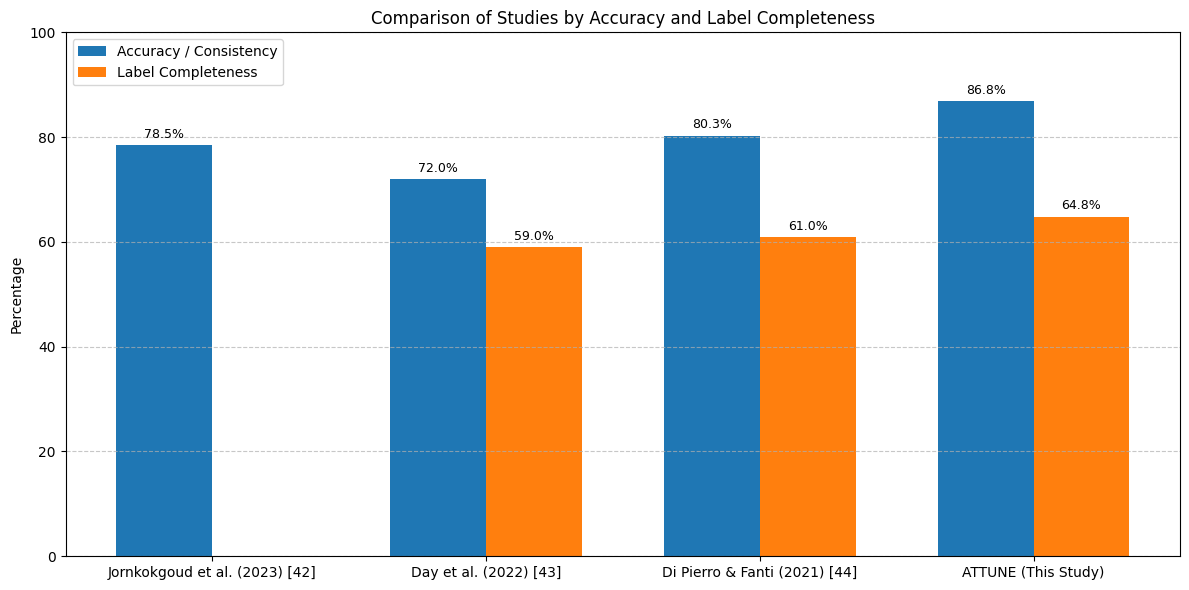

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Updated data
studies = [
    "Jornkokgoud et al. (2023) [42]",
    "Day et al. (2022) [43]",
    "Di Pierro & Fanti (2021) [44]",
    "ATTUNE (This Study)"
]
accuracy = [78.5, 72, 80.3, 86.84]
completeness = [None, 59, 61, 64.84]

# Bar positions
x = np.arange(len(studies))
width = 0.35

# Create plot
fig, ax = plt.subplots(figsize=(12, 6))

# Bars
bars1 = ax.bar(x - width/2, accuracy, width, label='Accuracy / Consistency')
bars2 = ax.bar(
    x + width/2,
    [c if c is not None else 0 for c in completeness],
    width,
    label='Label Completeness'
)

# Annotate bars
def annotate_bars(bars, values):
    for bar, val in zip(bars, values):
        if val is not None:
            height = bar.get_height()
            ax.annotate(f'{height:.1f}%',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3), textcoords="offset points",
                        ha='center', va='bottom', fontsize=9)

annotate_bars(bars1, accuracy)
annotate_bars(bars2, completeness)

# Labels and formatting
ax.set_ylabel('Percentage')
ax.set_title('Comparison of Studies by Accuracy and Label Completeness')
ax.set_xticks(x)
ax.set_xticklabels(studies, ha='center')  # Horizontal labels
ax.legend()
ax.set_ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()
